# High Precision Low Q<sup>2</sup> Asymmetry Data

Compilation of asymmetry data and recent global fit function by Douglas Higinbotham (Jefferson Lab).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# *q2       = four momentum transfer
# *ffratio  = form factor ratios
# *effratio = statistical uncertainty
# *sffratio = sytstematic uncertainty
# *tffratio = total uncertainty (added)

# Data from X. Zhan et al., PLB 705 (2011) 59.
zq2       = [ 0.298, 0.346, 0.402, 0.449, 0.494, 0.547, 0.599, 0.695 ]
zffratio  = [ 0.927, 0.943, 0.932, 0.931, 0.929, 0.927, 0.908, 0.912 ]
zeffratio = [ 0.011, 0.009, 0.007, 0.006, 0.005, 0.006, 0.005, 0.005 ]
zsffratio = [ 0.007, 0.009, 0.008, 0.007, 0.008, 0.007, 0.010, 0.011 ]
ztffratio = list(map(np.add,zeffratio,zsffratio))

# Data from M. Paolone et al., PRL 105 (2010) 072001.
pq2       = [ 0.800, 1.300 ]
pffratio  = [ 0.901, 0.858 ]
peffratio = [ 0.007, 0.008 ]
psffratio = [ 0.010, 0.018 ]
ptffratio = list(map(np.add,peffratio,psffratio))

# Data from C. Crawford et al., PRL 98 (2007) 052301. 
cq2       = [ 0.162,0.191,0.232,0.282,0.345,0.419,0.500,0.591]
cffratio  = [ 1.019,1.006,0.999,0.973,0.973,0.980,0.993,0.961]
ceffratio = [ 0.013,0.012,0.012,0.012,0.014,0.016,0.019,0.025]
csffratio = [ 0.015,0.014,0.012,0.011,0.010,0.009,0.008,0.007]
ctffratio = list(map(np.add,ceffratio,csffratio))

# Data from V. Punjabi et al., PRC 71 (2005) 055202.
vq2       = [ 0.49,  0.79, 1.18, 1.48, 1.77, 1.88 ]
vffratio  = [ 0.979, 0.951, 0.883, 0.798, 0.789, 0.777 ]
veffratio = [ 0.016, 0.012, 0.013, 0.029, 0.024, 0.024 ]
vsffratio = [ 0.006, 0.010, 0.018, 0.026, 0.035, 0.033 ]
vtffratio = list(map(np.add,veffratio,vsffratio))

# Function from C. Carlson et al., PRC 93 (2016) 065207.
def carlfunc(q2,delta):
    return (1-q2/(8.02*delta)) # [GeV/c]**2 units

def newasym(q2):
    return (( 1 +1.7721*q2)*(1+1.1839*q2)*(1-0.1183*q2))/((1+1.6890*q2)*(1+1.2679*q2))

Make a plot of the data and fit function.

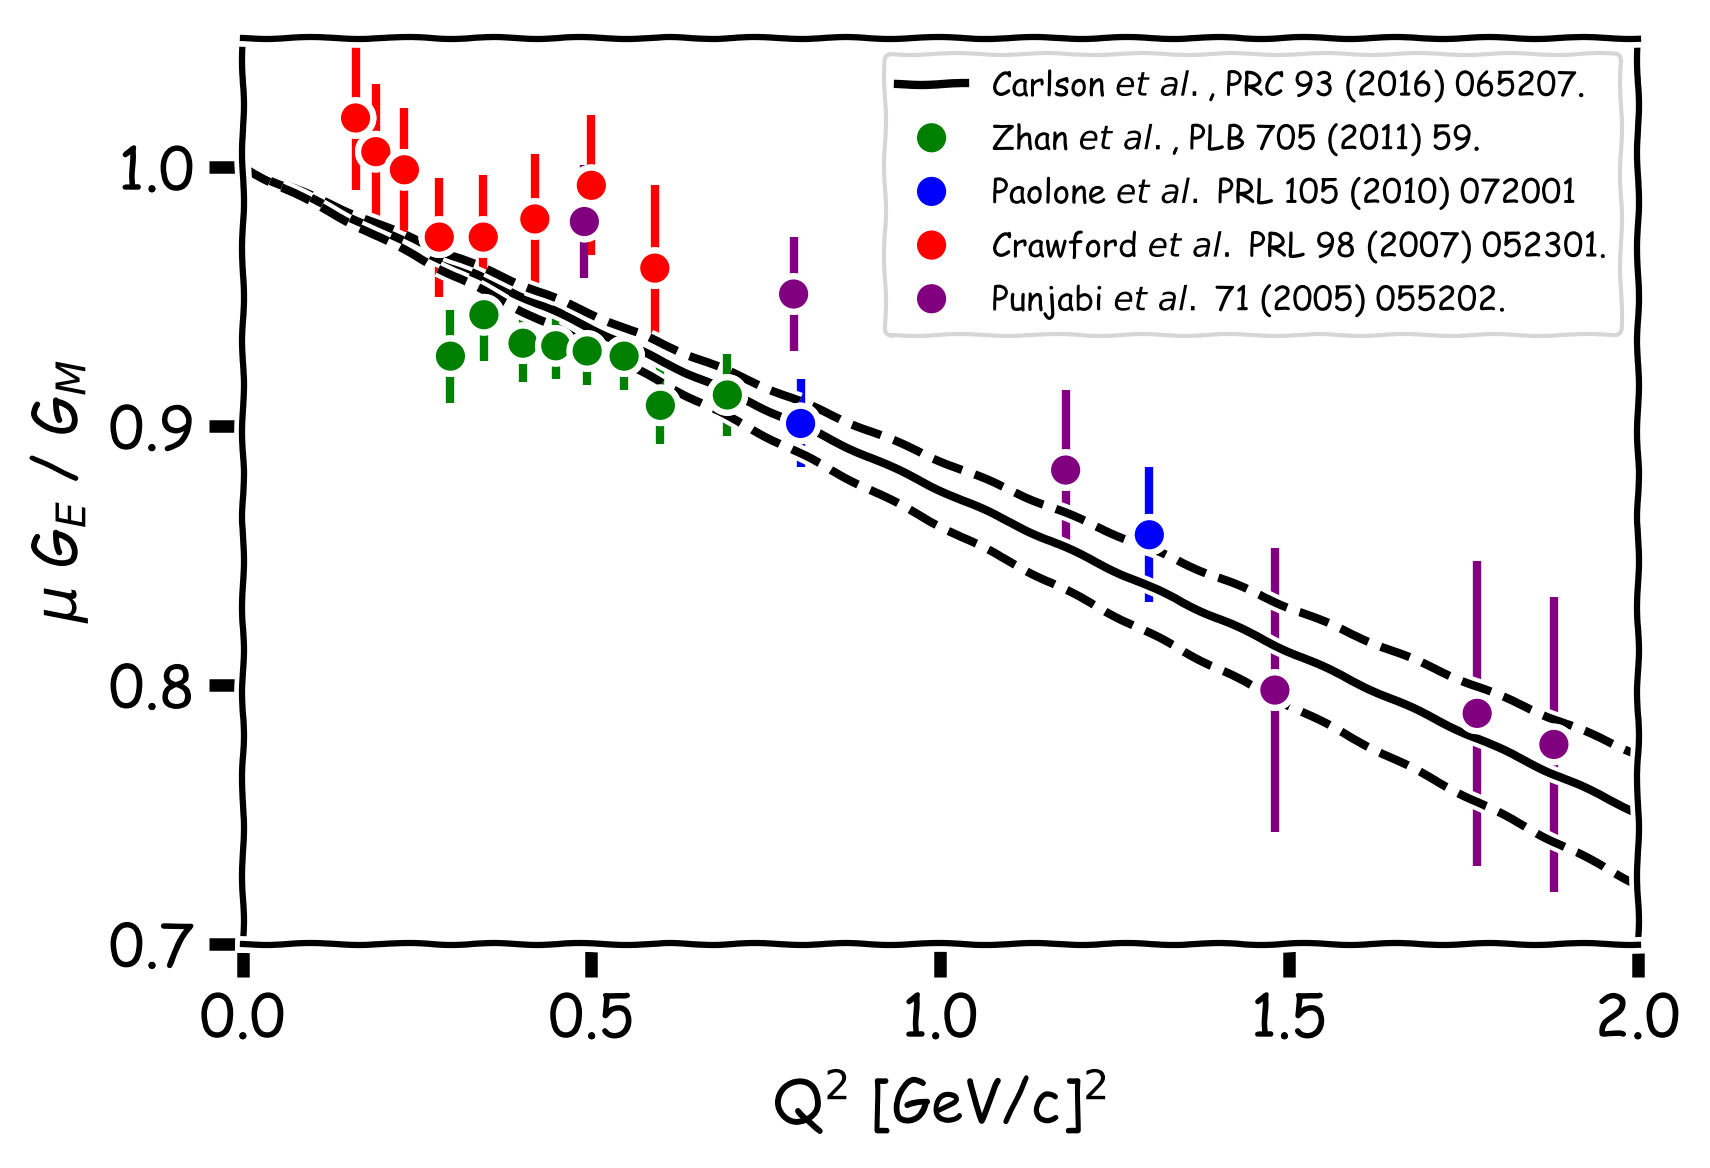

In [53]:
plt.xkcd() 
plt.figure(dpi=300)
rq2=np.linspace(0,2.0,100)

plt.plot(rq2,carlfunc(rq2,1),'-', color='black', \
             label='Carlson $\it{et\ al.}$, PRC 93 (2016) 065207.') 

plt.plot(rq2,carlfunc(rq2,1.1),'--', color='black')
plt.plot(rq2,carlfunc(rq2,0.9),'--', color='black')

plt.errorbar(zq2,zffratio, xerr=0, yerr=ztffratio, fmt='o',color='green' )
plt.plot(zq2,zffratio, 'o', color='green', zorder=10, \
             label='Zhan $\it{et\ al.}$, PLB 705 (2011) 59.')

plt.errorbar(pq2,pffratio, xerr=0, yerr=ptffratio, fmt='o', color='blue')
plt.plot(pq2,pffratio,'o',color='blue', \
             label='Paolone $\it{et\ al.}$ PRL 105 (2010) 072001')

plt.plot(cq2,cffratio, 'o', color='red', \
             label='Crawford $\it{et\ al.}$ PRL 98 (2007) 052301.')
plt.errorbar(cq2,cffratio, xerr=0, yerr=ctffratio, fmt='o', color='red')

plt.plot(vq2,vffratio, 'o', color='purple', \
             label='Punjabi $\it{et\ al.}$ 71 (2005) 055202.')
plt.errorbar(vq2,vffratio, xerr=0, yerr=vtffratio, fmt='o', color='purple')

plt.ylabel('$\mu$ G$_E$ / G$_M$')
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.ylim(0.7,1.05)
plt.xlim(0.00,2.00)
plt.rc('legend', fontsize=8)  
plt.legend()
plt.savefig("./Figures/AsymFigure.png") # Raster Graphic
plt.savefig("./Figures/AsymFigure.pdf") # Vector Graphic
plt.show()


In [54]:

#
# Check Total Chi2 vs Carlson Global Fit Function
#
# NOTE:  One could float the normalizations, in which case Zhan data
#        would shift up and Crawford down; but for this quick check
#        I just used the sum of errors and all the points.
#

chi2=0
count=0

for n in range(len(zq2)):
    chi2+=((carlfunc(zq2[n],1)-zffratio[n])/ztffratio[n])**2
    count+=1
for n in range(len(pq2)):
    chi2+=((carlfunc(pq2[n],1)-pffratio[n])/ptffratio[n])**2
    count+=1
for n in range(len(cq2)):
    chi2+=((carlfunc(cq2[n],1)-cffratio[n])/ctffratio[n])**2
    count+=1
for n in range(len(vq2)):
    chi2+=((carlfunc(vq2[n],1)-vffratio[n])/vtffratio[n])**2
    count+=1

print('Total Chi2 = {0:0.2f}, Total Points = {1:0.0f}, Reduced Chi2 {2:0.2f}'. \
      format(chi2,count,chi2/count))


Total Chi2 = 31.32, Total Points = 24, Reduced Chi2 1.30


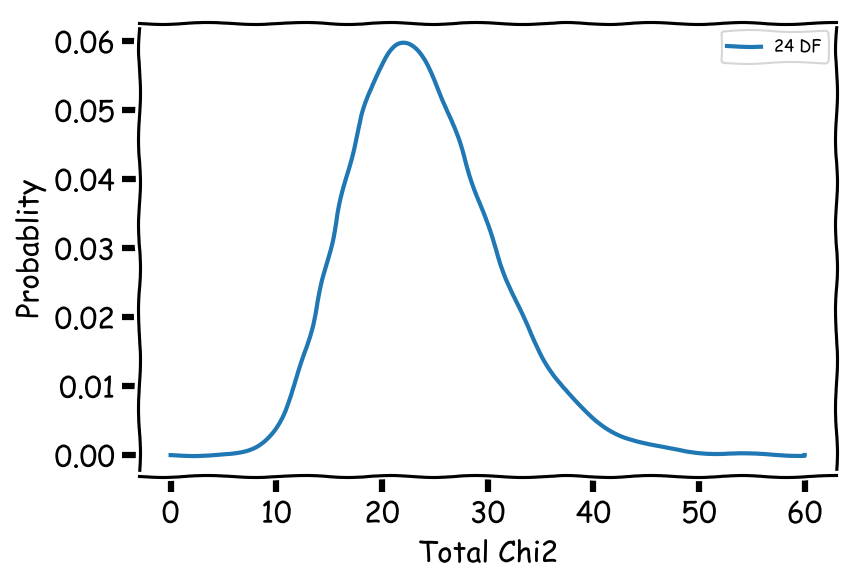

In [55]:
#
# Check The Chi2 Distribution Function To See How Reasonable 
# The Total Chi2 Is For The Given Number of Degrees of Freedom.
#

from scipy.stats import chi2

x=np.linspace(0,60,400)
y = chi2(24)

plt.figure(dpi=150)
#plt.xkcd()
plt.plot(x,y.pdf(x), label='24 DF')
plt.ylabel('Probablity')
plt.xlabel('Total Chi2')
plt.legend()
plt.show()

## References

* https://doi.org/10.1016/j.physletb.2011.10.002

* https://doi.org/10.1103/PhysRevC.93.065207

* https://doi.org/10.1103/PhysRevLett.105.072001

* https://doi.org/10.1103/PhysRevLett.98.052301
